# Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import config
from scipy.stats import mannwhitneyu

# Set constants

In [3]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (20, 6)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "violin.svg"

# Import data

In [4]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])
GMHI2_scores = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI2_scores.csv"), index_col=[0, 1])
GMHI_scores = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI_scores.csv"), index_col=[0, 1])
display(X.head())
display(y.head())
display(GMHI2_scores.head())
display(GMHI_scores.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-23  SAMEA3879547        0.019774                     0.019774   
         SAMEA3879551        0.000000                     0.000000   
         SAMEA3879543        0.003253                     0.003253   
         SAMEA3879565        0.008863                     0.008863   
         SAMEA3879546        0.000048                     0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-23  SAMEA3879547                                            0.019774   
         SAMEA3879551                                            0.000000   
         SAMEA3879543                                            0.003253   
         SAMEA3879565                                            0.008863   
         SAMEA3879546                                            0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-23  SAMEA3879547                                               0.019774                      
         SAMEA3879551                                               0.000000                      
         SAMEA3879543                                               0.003253                      
         SAMEA3879565                                               0.008863                      
         SAMEA3879546                                               0.000048                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-23  SAMEA3879547                                               0.019774                                             
         SAMEA3879551                                               0.000000                                             
         SAMEA3879543                                               0.003253                                             
         SAMEA3879565                                               0.008863                                             
         SAMEA3879546                                               0.000048                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-23  SAMEA3879547                                               0.019774                                                                   
         SAMEA3879551                                               0.000000                                                                   
         SAMEA3879543                                               0.003253                                                                   
         SAMEA3879565                                               0.008863                                                                   
         SAMEA3879546                                               0.000048                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-23  SAMEA3879547                                               0.019774              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-23  SAMEA3879547                              True
         SAMEA3879551                              True
         SAMEA3879543                              True
         SAMEA3879565                              True
         SAMEA3879546                              True

GMHI2
Study_ID Sample Accession          
GMHI-23  SAMEA3879547      1.864841
         SAMEA3879551     -0.068806
         SAMEA3879543     -0.870357
         SAMEA3879565      0.396061
         SAMEA3879546      1.148468

GMHI
Study_ID Sample Accession          
GMHI-23  SAMEA3879547      2.836720
         SAMEA3879551      1.030885
         SAMEA3879543      1.518635
         SAMEA3879565      1.229460
         SAMEA3879546      4.231553

# Compute other ecological indices for comparisons

## Compute Richness

In [5]:
X_species = X[list(filter(lambda x : "s__" in x, X.columns))]
richness = pd.DataFrame((X_species > config.PRESENCE_CUTOFF).sum(axis=1), columns=["Species Richness"])
richness

Species Richness
Study_ID Sample Accession                  
GMHI-23  SAMEA3879547                   106
         SAMEA3879551                    91
         SAMEA3879543                   127
         SAMEA3879565                   115
         SAMEA3879546                    76
...                                     ...
P140     SAMN07509557                    45
         SAMN07509558                     0
         SAMN07509546                    36
         SAMN07509552                    41
         SAMN07509921                    59

[9045 rows x 1 columns]

## Compute Shannon Diversity

In [6]:
shannon = pd.DataFrame(np.sum((-X_species * np.log(X_species)).fillna(0), axis=1), columns=["Shannon Diversity"])
shannon

Shannon Diversity
Study_ID Sample Accession                   
GMHI-23  SAMEA3879547               3.021834
         SAMEA3879551               3.020725
         SAMEA3879543               3.431392
         SAMEA3879565               3.415460
         SAMEA3879546               2.755221
...                                      ...
P140     SAMN07509557               2.280885
         SAMN07509558               0.000000
         SAMN07509546               1.100328
         SAMN07509552               1.882929
         SAMN07509921               2.508624

[9045 rows x 1 columns]

## Compute Simpsons Diversity

In [7]:
simpson = pd.DataFrame(np.sum(X_species ** 2, axis=1), columns=["Simpson Diversity"])
simpson

Simpson Diversity
Study_ID Sample Accession                   
GMHI-23  SAMEA3879547               0.101456
         SAMEA3879551               0.082273
         SAMEA3879543               0.058138
         SAMEA3879565               0.060272
         SAMEA3879546               0.109515
...                                      ...
P140     SAMN07509557               0.172615
         SAMN07509558               0.000000
         SAMN07509546               0.556355
         SAMN07509552               0.230215
         SAMN07509921               0.136114

[9045 rows x 1 columns]

# Aggregate data and plot!

In [8]:
num_healthy = y.values.sum()
num_nonhealthy = y.shape[0] - y.values.sum()
num_healthy, num_nonhealthy

(5819, 3226)

In [9]:
healthy_nonhealthy = y.copy()
healthy_nonhealthy.columns = ["Health status"]
healthy_text = "Healthy"
nonhealthy_text = "Nonhealthy"
healthy_nonhealthy[y.values] = healthy_text
healthy_nonhealthy[~y.values] = nonhealthy_text

data = pd.concat([GMHI2_scores, GMHI_scores, healthy_nonhealthy, richness, shannon, simpson], axis=1)
data

GMHI2      GMHI Health status  Species Richness  \
Study_ID Sample Accession                                                       
GMHI-23  SAMEA3879547      1.864841  2.836720       Healthy               106   
         SAMEA3879551     -0.068806  1.030885       Healthy                91   
         SAMEA3879543     -0.870357  1.518635       Healthy               127   
         SAMEA3879565      0.396061  1.229460       Healthy               115   
         SAMEA3879546      1.148468  4.231553       Healthy                76   
...                             ...       ...           ...               ...   
P140     SAMN07509557      0.014177  0.627861    Nonhealthy                45   
         SAMN07509558      0.000000  0.000000    Nonhealthy                 0   
         SAMN07509546     -1.013114 -2.375201    Nonhealthy                36   
         SAMN07509552     -0.809779  1.190039    Nonhealthy                41   
         SAMN07509921     -0.132474  0.961839    Nonhealthy                59   

                           Shannon Diversity  Simpson Diversity  
Study_ID Sample Accession                                        
GMHI-23  SAMEA3879547               3.021834           0.101456  
         SAMEA3879551               3.020725           0.082273  
         SAMEA3879543               3.431392           0.058138  
         SAMEA3879565               3.415460           0.060272  
         SAMEA3879546               2.755221           0.109515  
...                                      ...                ...  
P140     SAMN07509557               2.280885           0.172615  
         SAMN07509558               0.000000           0.000000  
         SAMN07509546               1.100328           0.556355  
         SAMN07509552               1.882929           0.230215  
         SAMN07509921               2.508624           0.136114  

[9045 rows x 6 columns]

In [10]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

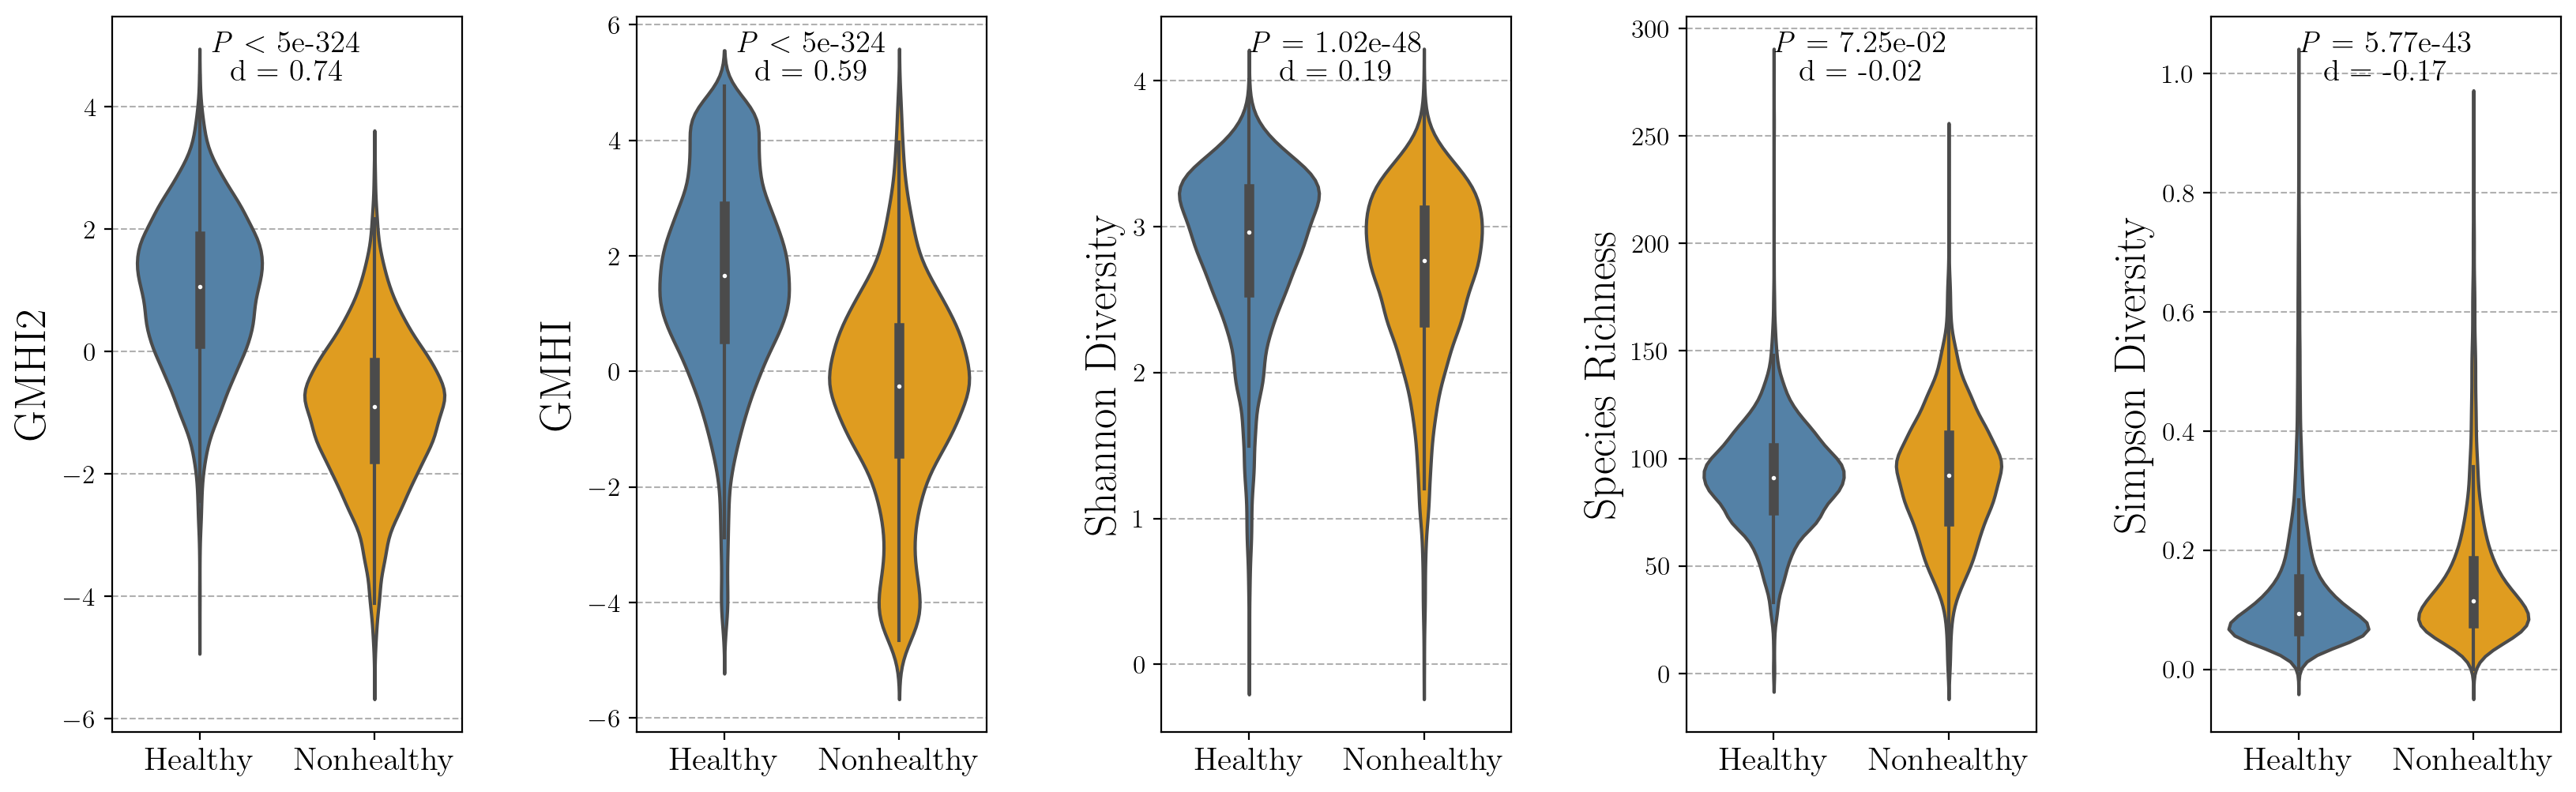

In [11]:
fig, axs = plt.subplots(ncols=5, figsize=figsize, dpi=dpi)
indices = ["GMHI2", "GMHI", "Shannon Diversity","Species Richness", "Simpson Diversity"]
for ind, ax in zip(indices, axs):
    v = sns.violinplot(x="Health status", y=ind, data=data, ax=ax, 
                   palette={healthy_text : healthy_color, nonhealthy_text : nonhealthy_color})
    cliffs_delta, man_whitney_u_p_val = observeDifference(data[ind].iloc[y.values], data[ind].iloc[~y.values])
    
    p_text = (r"\textit{P} $<$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
        r"\textit{P} = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
    )
    
    ax.text(0.5, 0.95, p_text, fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.91, f"d = {'%.2f' % cliffs_delta}", fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(axis="y", labelsize=12)
    v.tick_params(axis="x", labelsize=15)
    ax.yaxis.label.set_size(20)
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(config.FIGURE_DIR, filename))